In [1]:
# Libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import joblib

In [50]:
# For label-generating model:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score

In [52]:
#Library to validate the model
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

### EDA

#### Columns:


1. Name: The name of the music track.

2. Album: The name of the album to which the music track belongs.

3. Artist: The name of the artist or band who performed the music track.

4. ID: A unique identifier for the music track, often used internally by Spotify or other music platforms.

5. Release Date: The date when the music track was released

6. popularity: represents the popularity score of a track or an artist on Spotify. This score is calculated by Spotify based on factors like the number of streams, recent streams, and other engagement metrics. It provides an indication of how popular a track or artist is relative to others.

1. danceability: Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm
stability, beat strength, and overall regularity. Values range from 0 to 1, where 0 is least danceable and 1 is most danceable.

7. acousticness: A measure of the confidence that a track is acoustic. Values range from 0 to 1, where 1 represents high confidence that the track is acoustic.

2. energy: Represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. Values range from 0 to 1, where 0 is least energetic and 1 is most energetic.

3. key: The key the track is in, encoded as integers in pitch class notation (0 = C, 1 = C♯/D♭, 2 = D, and so on).

4. loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.

5. mode: Modality indicates the modality of a track (major or minor), represented as either 0 (minor) or 1 (major).

6. speechiness: Detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g., talk show, audio book, poetry), the higher the value. Values range from 0 to 1.

8. instrumentalness: Predicts whether a track contains no vocals. Values range from 0 to 1, where 1 represents high confidence that the track is instrumental.

9. liveness: Detects the presence of an audience in the recording. Values above 0.8 provide a strong likelihood that the track is live.

10. valence: Describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g., happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g., sad, depressed, angry). Values range from 0 to 1.

11. tempo: The overall estimated tempo of a track in beats per minute (BPM).

13. duration_ms: The duration of the track in milliseconds.

14. time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar and which note value constitutes one beat.

16. Mood: This column likely contains labels or categories indicating the mood or emotional tone of the music track, which could be assigned manually or derived from other features in the dataset.

In [59]:
# import data with labels
data = pd.read_csv("data/data_moods.csv")

In [60]:
data.columns

Index(['name', 'album', 'artist', 'id', 'release_date', 'popularity', 'length',
       'danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'valence', 'loudness', 'speechiness', 'tempo', 'key',
       'time_signature', 'mood'],
      dtype='object')

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              686 non-null    object 
 1   album             686 non-null    object 
 2   artist            686 non-null    object 
 3   id                686 non-null    object 
 4   release_date      686 non-null    object 
 5   popularity        686 non-null    int64  
 6   length            686 non-null    int64  
 7   danceability      686 non-null    float64
 8   acousticness      686 non-null    float64
 9   energy            686 non-null    float64
 10  instrumentalness  686 non-null    float64
 11  liveness          686 non-null    float64
 12  valence           686 non-null    float64
 13  loudness          686 non-null    float64
 14  speechiness       686 non-null    float64
 15  tempo             686 non-null    float64
 16  key               686 non-null    int64  
 1

#### Feature Selection:

In [62]:
# average values
sad_values = data[data["mood"]=="Sad"].describe().loc["mean"]
happy_values = data[data["mood"]=="Happy"].describe().loc["mean"]
calm_values = data[data["mood"]=="Calm"].describe().loc["mean"]
energetic_values = data[data["mood"]=="Energetic"].describe().loc["mean"]

In [63]:
moods_values=pd.DataFrame({"Sad":sad_values, "Happy": happy_values,"Calm":calm_values, "Energetic":energetic_values}).T
moods_values

,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature
Sad,37.730964,247504.472081,0.497245,0.578826,0.388068,0.201832,0.140655,0.289372,-10.569183,0.041736,115.599746,5.578680,3.832487
Happy,48.585714,230963.850000,0.622914,0.127849,0.751857,0.126103,0.201682,0.579095,-7.275750,0.061774,124.213679,5.078571,3.964286
Calm,40.261538,193977.061538,0.406815,0.883348,0.156325,0.890769,0.115418,0.151421,-20.955826,0.040742,108.851215,5.441026,3.758974
Energetic,41.603896,215779.948052,0.512240,0.028229,0.883669,0.056607,0.233897,0.437049,-4.695844,0.079170,132.060636,5.123377,3.974026


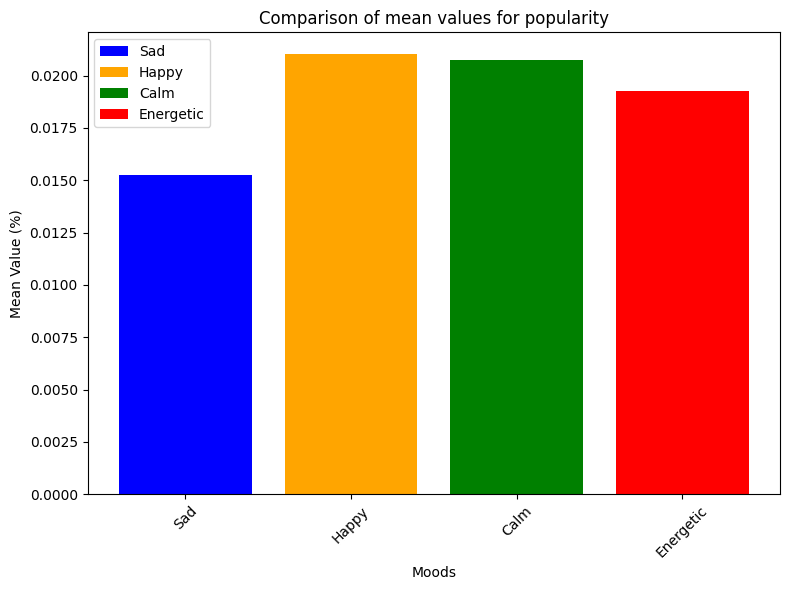

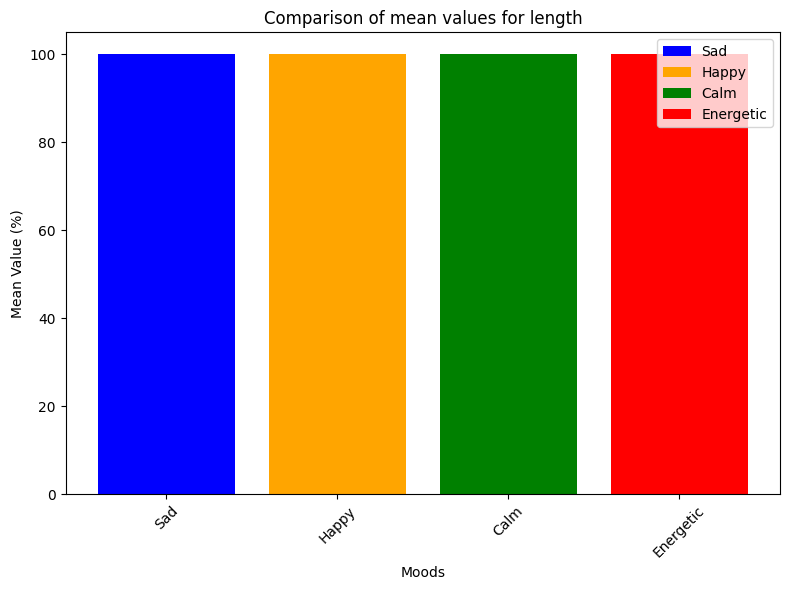

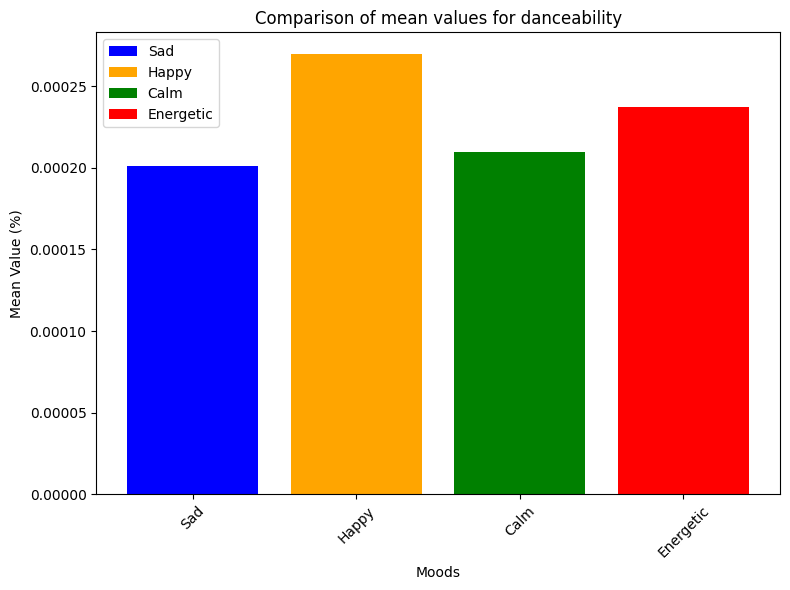

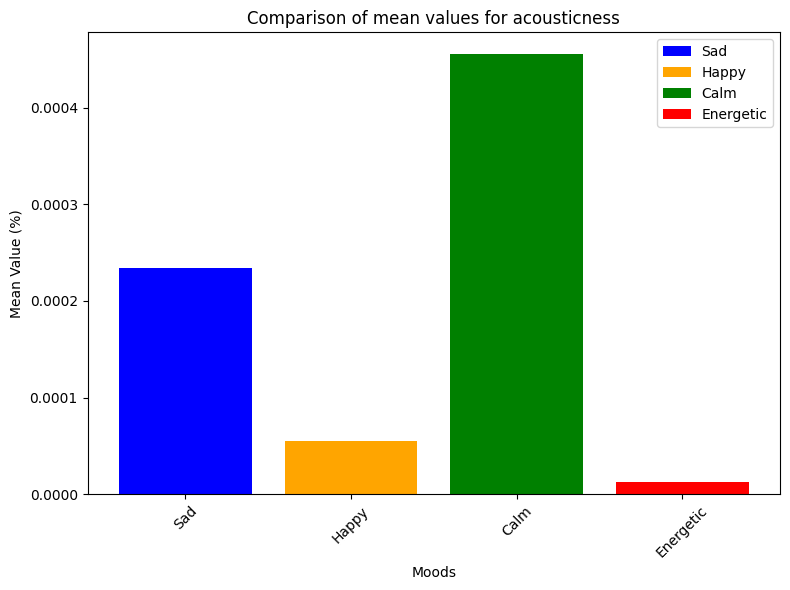

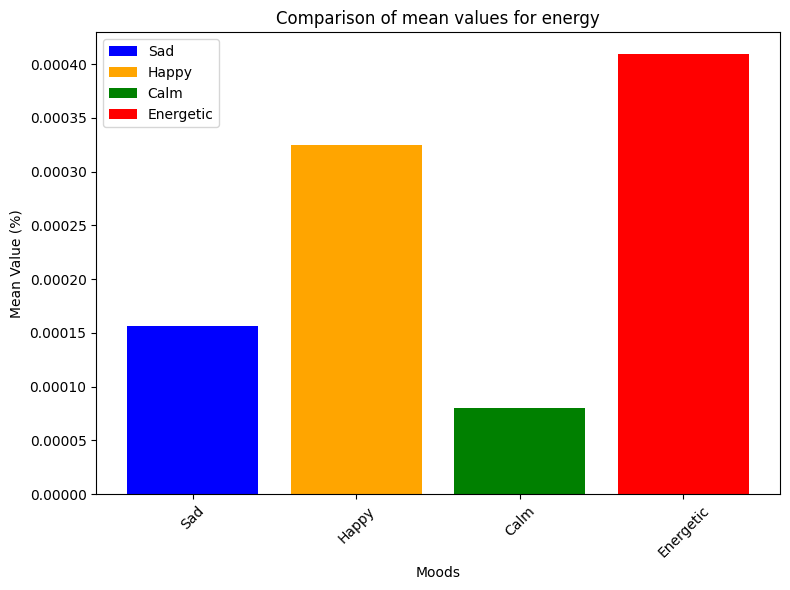

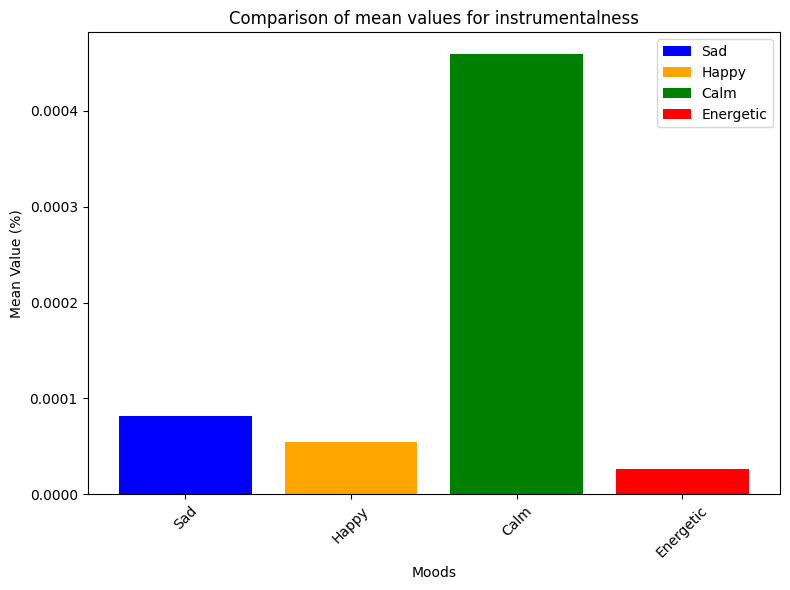

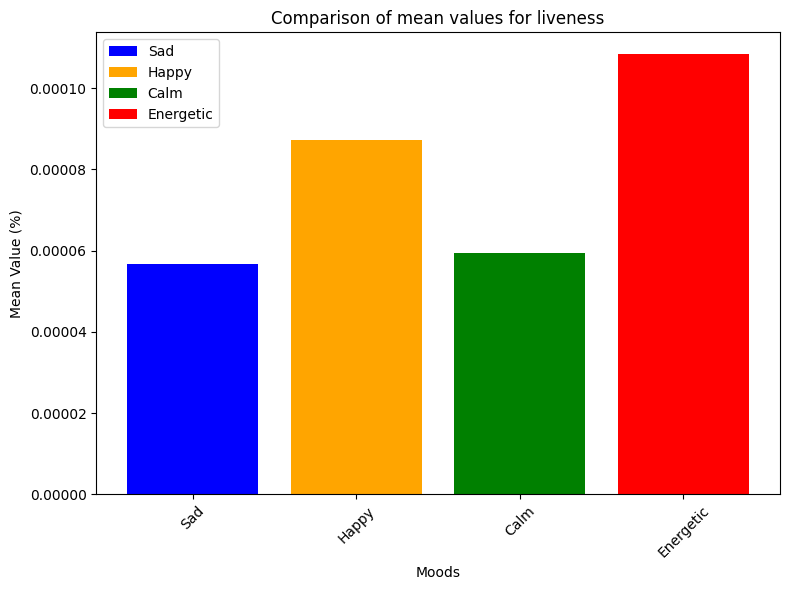

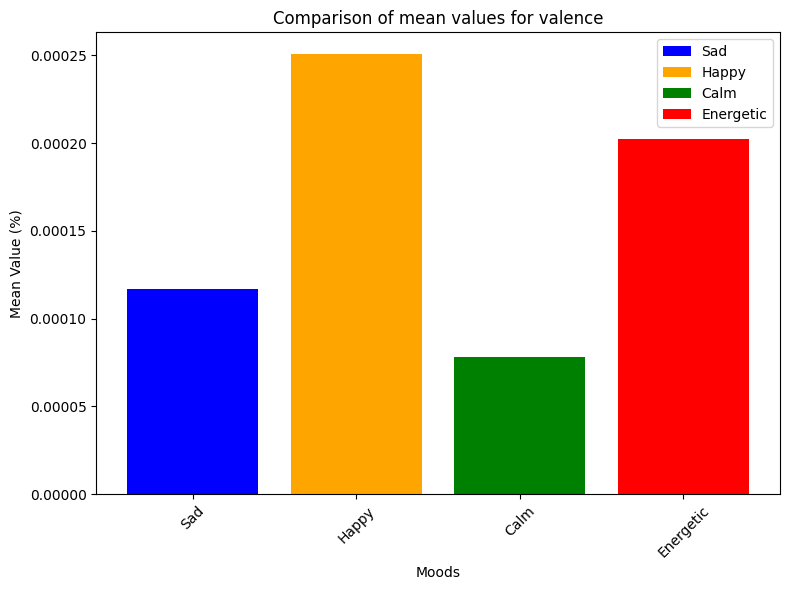

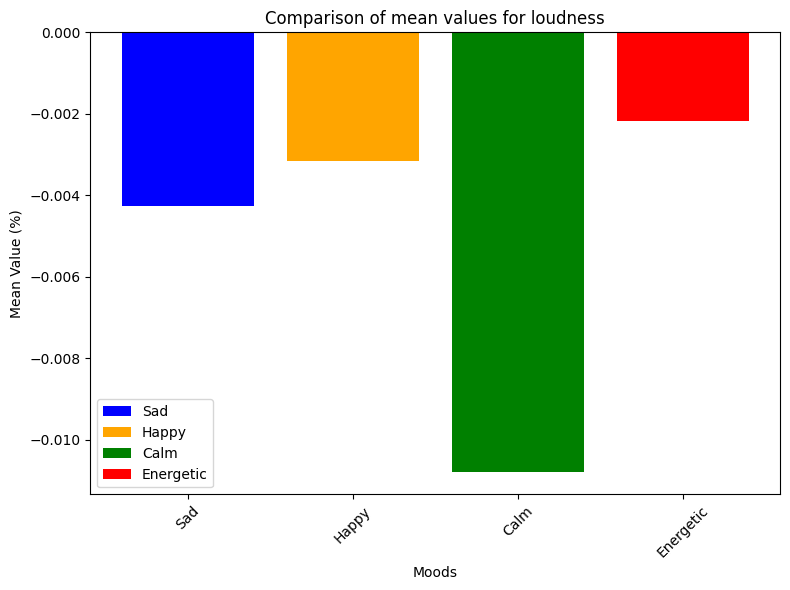

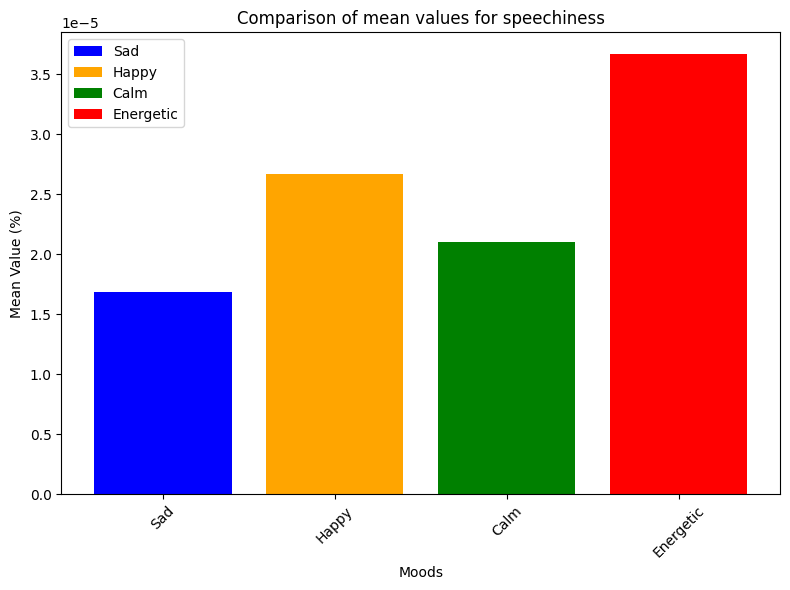

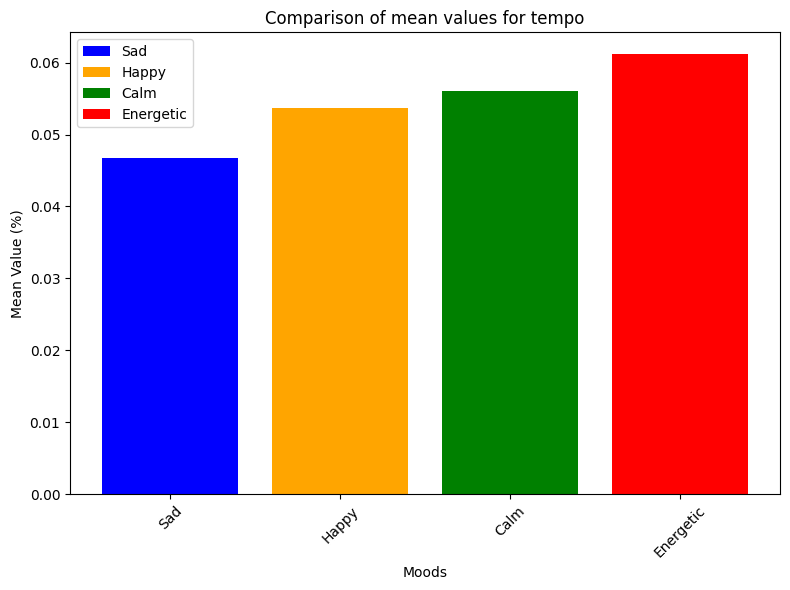

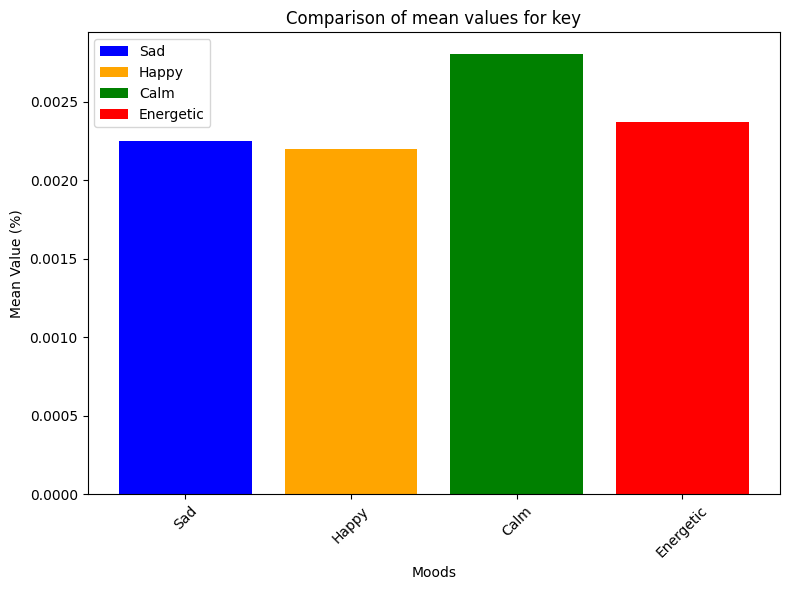

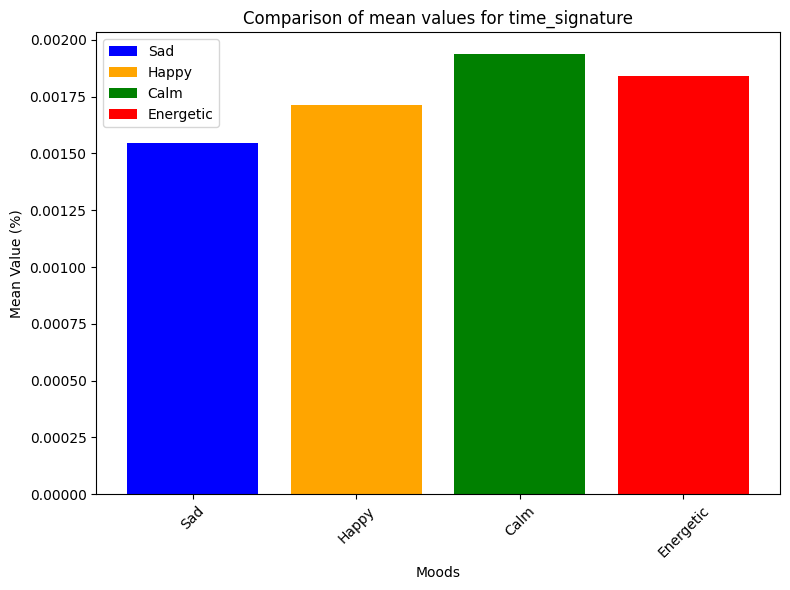

In [64]:
# Define colors for each mood
colors = {'Sad': 'blue', 'Happy': 'orange', 'Calm': 'green', 'Energetic': 'red'}

# Iterate over each column (feature) of the DataFrame
for column in moods_values:
    # Create a bar plot to compare mean values for each mood and feature
    plt.figure(figsize=(8, 6))
    for mood in moods_values.index:
        # Convert mean values to percentages
        total = moods_values.loc[mood].sum()
        percent_values = (moods_values.loc[mood, column] / total) * 100
        plt.bar(mood, percent_values, color=colors[mood], label=mood)

    plt.xlabel('Moods')
    plt.ylabel('Mean Value (%)')  # Update ylabel to indicate percentage
    plt.title(f'Comparison of mean values for {column}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

For the feature selection, I choose the ones that are most representative: danceability, acousticness, energy, instrumentalness, liveness, valence, loudness, speechiness, and tempo.

In [65]:
# Feature columns
col_features = ['danceability',
                'acousticness',
                'energy',
                'instrumentalness',
                'liveness',
                'valence',
                'loudness',
                'speechiness',
                'tempo']


# Scaling data
scaler = MinMaxScaler()
X = scaler.fit_transform(data[col_features])

# target
y = data['mood']

In [66]:
# Encode categories
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

In [67]:
# Train/Test
X_train, X_val, y_train, y_val = train_test_split(X,encoded_y, test_size=0.2, random_state=42)

In [68]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get the coefficients (weights) of the model
feature_weights = model.coef_[0]

# Create a dictionary with features and their weights
feature_weights_dict = {feature: weight for feature, weight in zip(col_features, feature_weights)}

# Sort the features by their weights in descending order
sorted_features = sorted(feature_weights_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Select the top features, for example, the 5 with the highest absolute weights
top_features = [feature[0] for feature in sorted_features[:5]]

print("Top features based on weights:", top_features)

Top features based on weights: ['instrumentalness', 'energy', 'acousticness', 'loudness', 'valence']


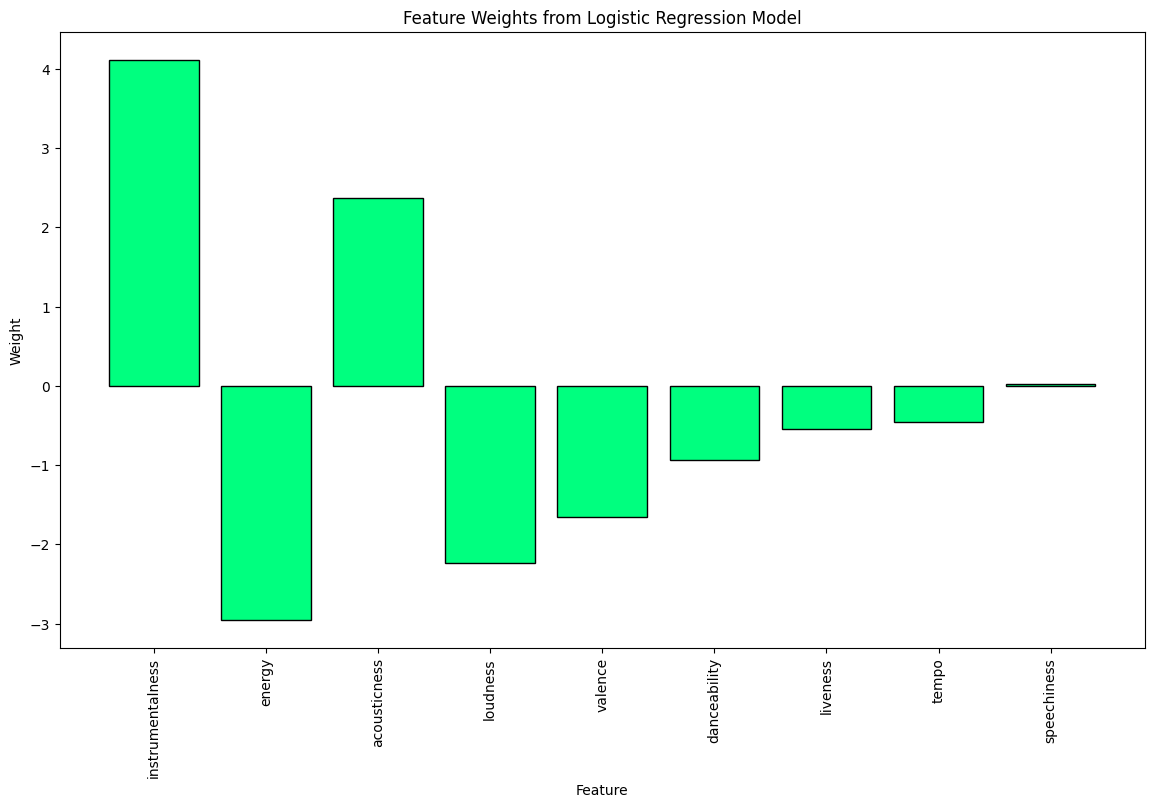

In [69]:
# Extract feature names and weights for all features
feature_names = [feature[0] for feature in sorted_features]
weights = [feature[1] for feature in sorted_features]

# Create a bar plot
plt.figure(figsize=(14, 8))
plt.bar(feature_names, weights, color='springgreen', edgecolor='black')
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.title('Feature Weights from Logistic Regression Model')
plt.xticks(rotation=90)
plt.show()

#### Target:

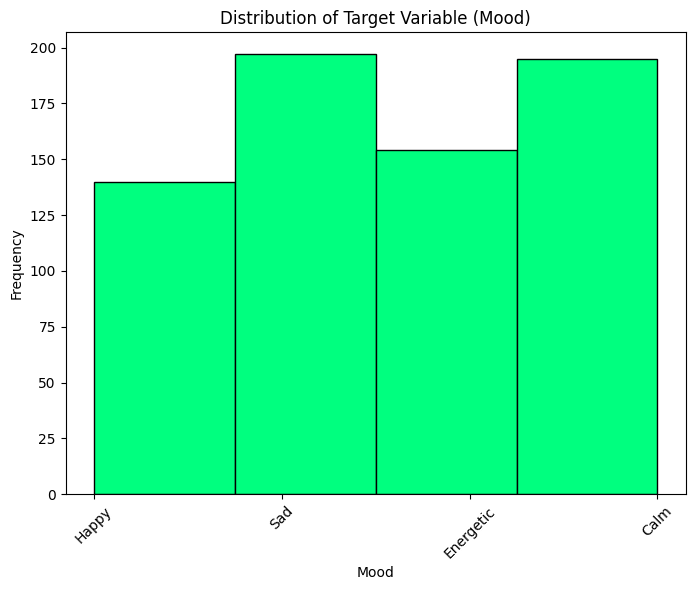

In [70]:
# Plotting the distribution of the target variable
plt.figure(figsize=(8, 6))
plt.hist(y, bins=len(set(y)), color='springgreen', edgecolor='black')
plt.xlabel('Mood')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable (Mood)')
plt.xticks(rotation=45)
plt.show()

In [71]:
target = pd.DataFrame({'mood':data['mood'].tolist(),'encode':encoded_y}).drop_duplicates().sort_values(['encode'],ascending=True)
target

,mood,encode
5,Calm,0
4,Energetic,1
0,Happy,2
1,Sad,3


It's not completely balanced.

### MODEL

In [74]:
# Define models
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
xgb_model = XGBClassifier()

# Define parameter grids for grid search for each model
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 10],
    'min_child_weight': [1, 3, 5]
}

# Perform grid search for each model
rf_grid = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, n_jobs=-1)
gb_grid = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, n_jobs=-1)
xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, n_jobs=-1)

# Define the datasets X_train and y_train

# Perform grid search for each model
rf_grid_result = rf_grid.fit(X_train, y_train)
gb_grid_result = gb_grid.fit(X_train, y_train)
xgb_grid_result = xgb_grid.fit(X_train, y_train)

# Print results
print("Random Forest Best: %f using %s" % (rf_grid_result.best_score_, rf_grid_result.best_params_))
print("Gradient Boosting Best: %f using %s" % (gb_grid_result.best_score_, gb_grid_result.best_params_))
print("XGBoost Best: %f using %s" % (xgb_grid_result.best_score_, xgb_grid_result.best_params_))


Random Forest Best: 0.815696 using {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Gradient Boosting Best: 0.806622 using {'learning_rate': 0.5, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
XGBoost Best: 0.821184 using {'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 100}


XGBoost Best: 0.821184 using {'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 100}

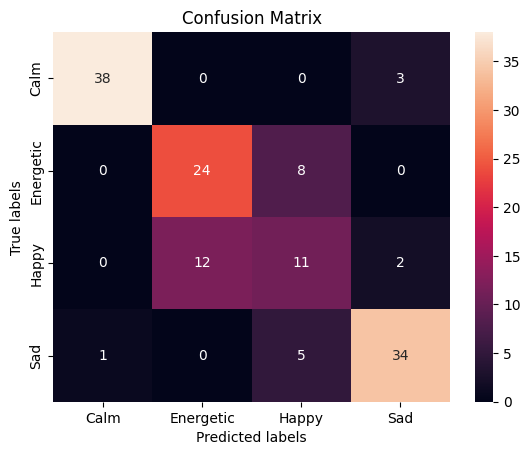

Accuracy Score: 0.7753623188405797


In [76]:
# Define the best hyperparameters
best_params = {'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 100}

# Create an instance of XGBClassifier with the best hyperparameters
best_model = XGBClassifier(**best_params)

# Train the model using the entire training dataset
best_model.fit(X_train, y_train)

# Predict the labels for the validation dataset
y_preds = best_model.predict(X_val)

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_preds)

# Visualize the confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)

# Set labels for the confusion matrix
labels = target['mood']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Show the confusion matrix plot
plt.show()

# Compute and print the accuracy score
print("Accuracy Score:", accuracy_score(y_val, y_preds))


In [80]:
# Save the model to a file
joblib.dump(best_model, 'best_xgb_model.pkl')

['best_xgb_model.pkl']